In [3]:
# import all the required Libraries
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
import math as math
import warnings
warnings.filterwarnings("ignore")
from IPython import display
import networkx as nx

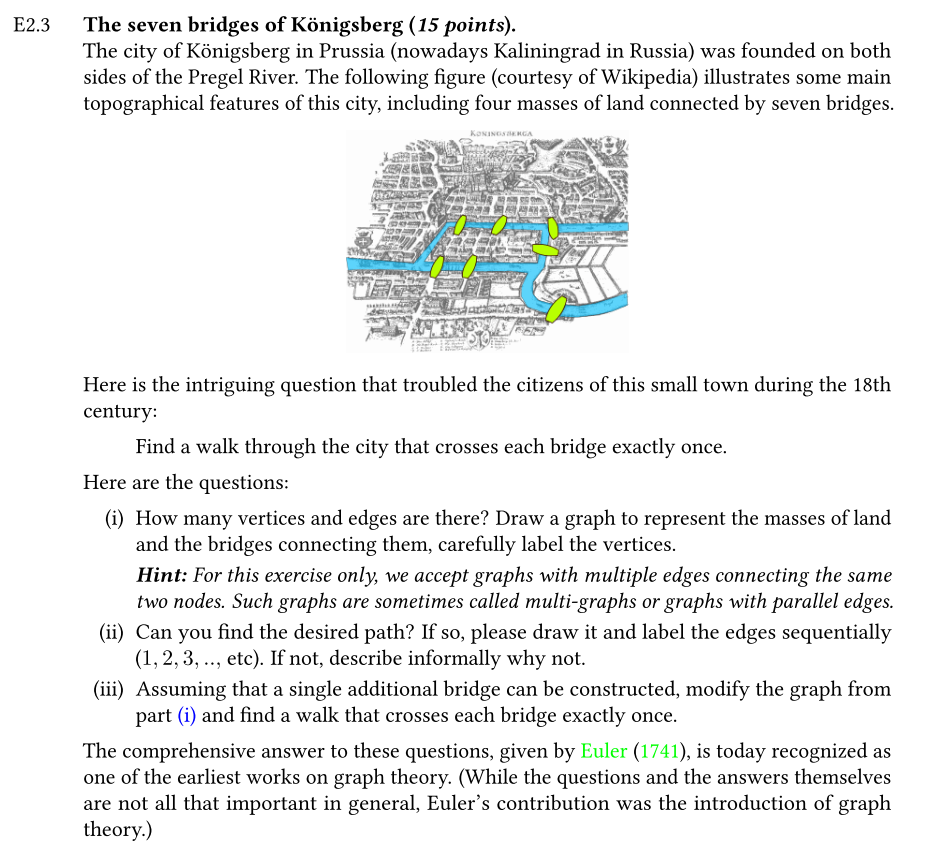

In [3]:
display.Image("./EX_2_3.png")

# 2.3 Solution

## Part $\mathrm{(i)}$

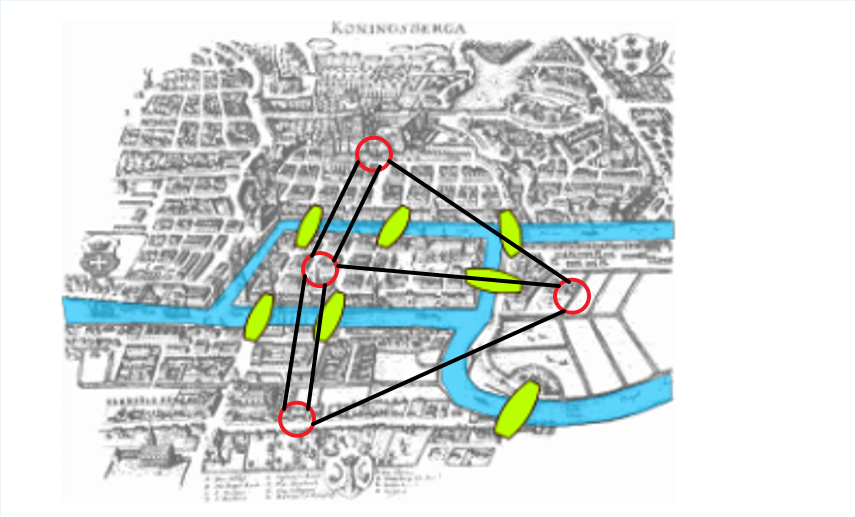

In [12]:
display.Image("./konigsberg.png")

There are 4 Nodes/Vertices and 7 Edges

## Part $\mathrm{(ii)}$

There are not enoughe edges. 

## Part $\mathrm{(iii)}$

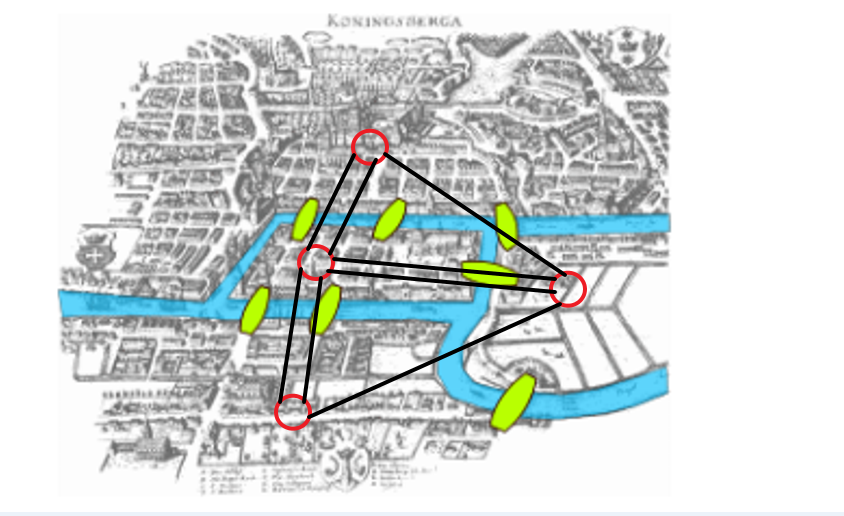

In [13]:
display.Image("./konigsberg2.png")

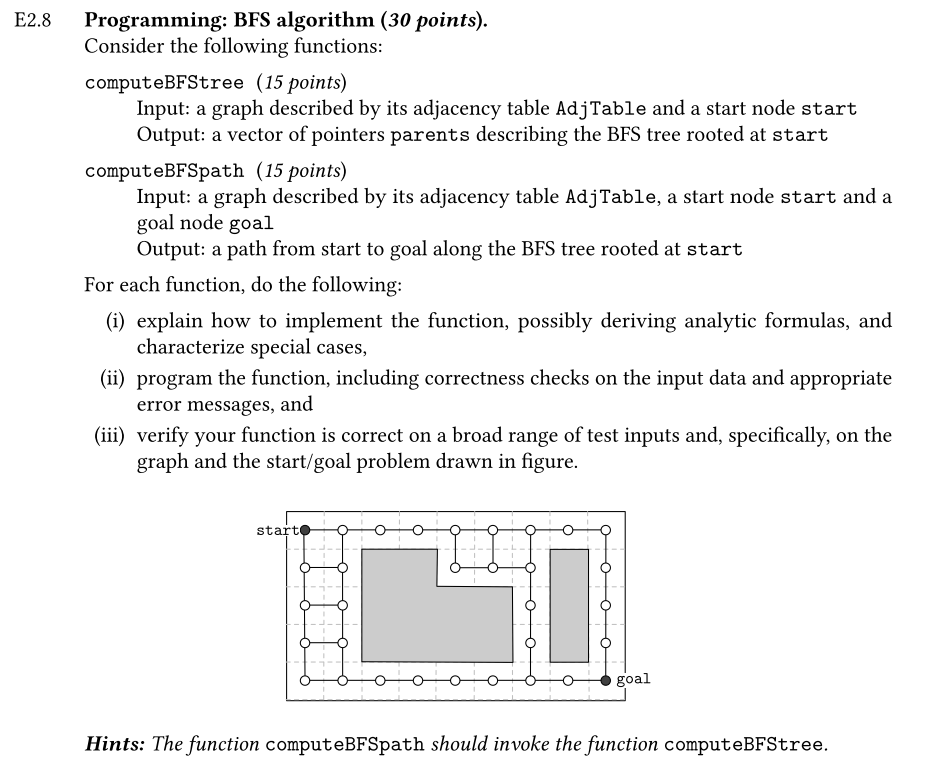

In [4]:
display.Image("./EX_2_8.png")

# 2.8 Solution

####  BflsALg() : Implements BFS search in Nodal Network
##### Methods:
1. PrintGraphNet  : Prints the total network from adjacent list input
2. TableToMat     : Returns adjacent matrix from adjacent list 
3. ComputeBfsTree : Returns parent-child vector
4. ComputeBfsPath : Returns start to end path
5. GraphNetwork   : Plots network graph. ( Under construction)   

In [4]:
class BfsAlg:
    def __init__(self):           # constructor
        print("Created a Bfs Algorithm Instance")
        
        
    #--------------Print Total Network of Input Graph---------------------- 
        
    def PrintGraphNet(self,arg):  # Takes a list as an input argument and prints it.
    
        """ 
        Author: Arif
        Input Argument  : Adjacent List of a Set of Graph
        
        Output Argument : Prints Total Network 
        """
        
        NumNode = len(arg)        # number of nodes in the set of input Graph
        
        i=0;                      # initialize loop iterator
        
        print("Node0: Start  Node_last: Goal")
        print("--------------------------")
        
        while(i<NumNode):
            
            print("Nodes Connected To Node,"+str(i))
            print(arg[i])
            
            i=i+1
                  
         
        return
    
    #------------------------------------Find Adjacency matrix from adjacency table-------------------------------------
    def TableToMat(self,arg):
        
        """ 
        Author: Arif
        Input Argument  : Adjacent List of a Set of Graph
        
        Output Argument : Returns Adjacency Matrix 
        """
        
        NodeNum = len(arg) # number of total nodes
        
        AdMat = np.zeros((NodeNum,NodeNum))  # initialize a matrix of zeros
        
        AdMat[0][0] = 1  # initialize the start node as connceted
        
        col = 0          # initialize column iterator
        
        for row in range(0,NodeNum):   # row traversal
            
            while(col<len(arg[row])):  # col must be less then total number of edge for a specefic node
                
                Node = arg[row][col]   # locate Node2
                AdMat[row][Node]=1     # ff Node1(row) is connected to Node2 then assign value 1 to adjacent matrix
                
                col=col+1              # increase col iterator
                
                
            col = 0                    # reinitialize column iterator
        
        return AdMat
        
       


    #-----------Compute BFS Tree---------------------------------------
    
    def ComputeBfsTree(self,arg):
        
        '''
        Author: Arif
        Input Argument  : Adjacent List of a Set of Graph
        
        Output Argument : returns an array of tree where 
               
        '''
        parent = []  # initialize array
        
        myQ    = []  # initialize the queue
        
        N = BfsAlg() # create instance
        
        AdjMat  = N.TableToMat(arg) # get adjacent matrix
        
        NodeNum = len(arg)          # Node numbers  
        
        # Intialize parent array with NONE which means these nodes are unvisited
        for x in range(0,len(arg)):
                        
            parent.insert(x, 'NONE')    # unvisted nodes are parent 
            
        
        parent[0] = 0                   # starting node is it's own parent. Funny!
        
        
        
        myQ.insert(0, 0)                # initizlize with starting node
        
        u = 0                           # initialize node iterator
        while(len(myQ)!=0):             # as long as Queue has element keep moving
            
            v = myQ.pop(0)              # butt kick the first guy standing in the queue
            
            
            
           # check for each connected unvisited node
            while(u<NodeNum):
                if(parent[u]=='NONE' and AdjMat[u][v]==1):             # Adjacency matrix to check if u and v have connected edge and u is unvisited
                    parent[u] = v                                      # change the index(each node) value of parent array from NONE to v(this is the parent of u ) 
                    myQ.insert(len(myQ), u)                            # put it back in queue
                    u=u+1                                              # go to next node
                else:
                    u=u+1   # go to next node                           
            u = 0           # reinitialize the u nodes
           
              
                     
                 
        
        return parent
        
    #-----------Graph Total Network (***Under Construction)---------------------------------------
    
    def GraphNetwork(self,arg1):
        
        '''
        Author: Arif
        Input Argument  : Adjacent List of a Set of Graph
        
        Output Argument : Network graph plot
               
        '''
        
        i = 0
        
        G = nx.Graph()
        p = BfsAlg()
        NumNode = len(arg1)
        AdjMat  = p.TableToMat(arg1)
        
        while(i<NumNode):
            
            G.add_node(i)
            i=i+1
            
        row = 0
        col = 0
        
        while(row<NumNode):
            while(col<NumNode):
                if(AdjMat[row][col]==1):
                    G.add_edge(row,col)
                    col=col+1
                else:
                    col=col+1
                
            col=0
            
            row=row+1
            
                
     
            
            
        return nx.draw(G)
            
            
    def ComputeBfsPath(self,arg1,parent):
        '''
        Author: Arif
        Input Argument  : [Arg1]: AdjacentList. We are asuming last node of the list as goal for now
                          [Arg2]: Parent values
        
        Output Argument : Planned path P
               
        '''
        
        NumNode=len(parent)           # get the number of nodes
        
        vgoal =  parent[NumNode-1]    # we are assuming last node is the destination node
        
        P     = []                    # initialize a queue for storing path nodes
        
        P.insert(0, vgoal)            # initialize Path array with destination node
        
        u     = vgoal                 # initialize variable node u with destination node
        
        while(parent[u]!=0):          # Unitll root/ starting position is found, keep looping
            u = parent[u]               # By finding parent of each node, reach to the root/starting node 
            P.insert(0, u)              # store parents info in queue P. This is going ot be the route 
            
            u = u-1;                    # go to preceding parent
            
        P.insert(0, 0)  #  insert root parent at first
        
        return print(f'Destination could be reached by using Nodes {P}')
        
     

In [5]:
p=BfsAlg()

Created a Bfs Algorithm Instance


In [1]:
AdjList3=[[1,2],[0,3],[0],[1,4],[3]]

In [7]:
p.PrintGraphNet(AdjList3)

Node0: Start  Node_last: Goal
--------------------------
Nodes Connected To Node,0
[1, 2]
Nodes Connected To Node,1
[0, 3]
Nodes Connected To Node,2
[0]
Nodes Connected To Node,3
[1, 4]
Nodes Connected To Node,4
[3]


In [6]:
parent = p.ComputeBfsTree(AdjList3)

Created a Bfs Algorithm Instance


In [9]:
p.ComputeBfsPath(AdjList3,parent)

Destination could be reached by using Nodes [0, 1, 3]


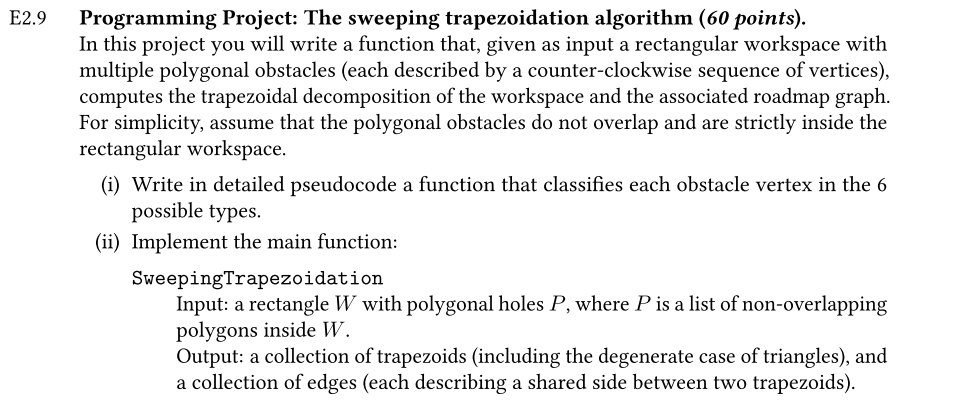

In [87]:
display.Image("./EX_2_9.png")

# 2.9 Solution

## Part $\mathrm{(i)}$

### Some Foundamental Geometrical Concept 

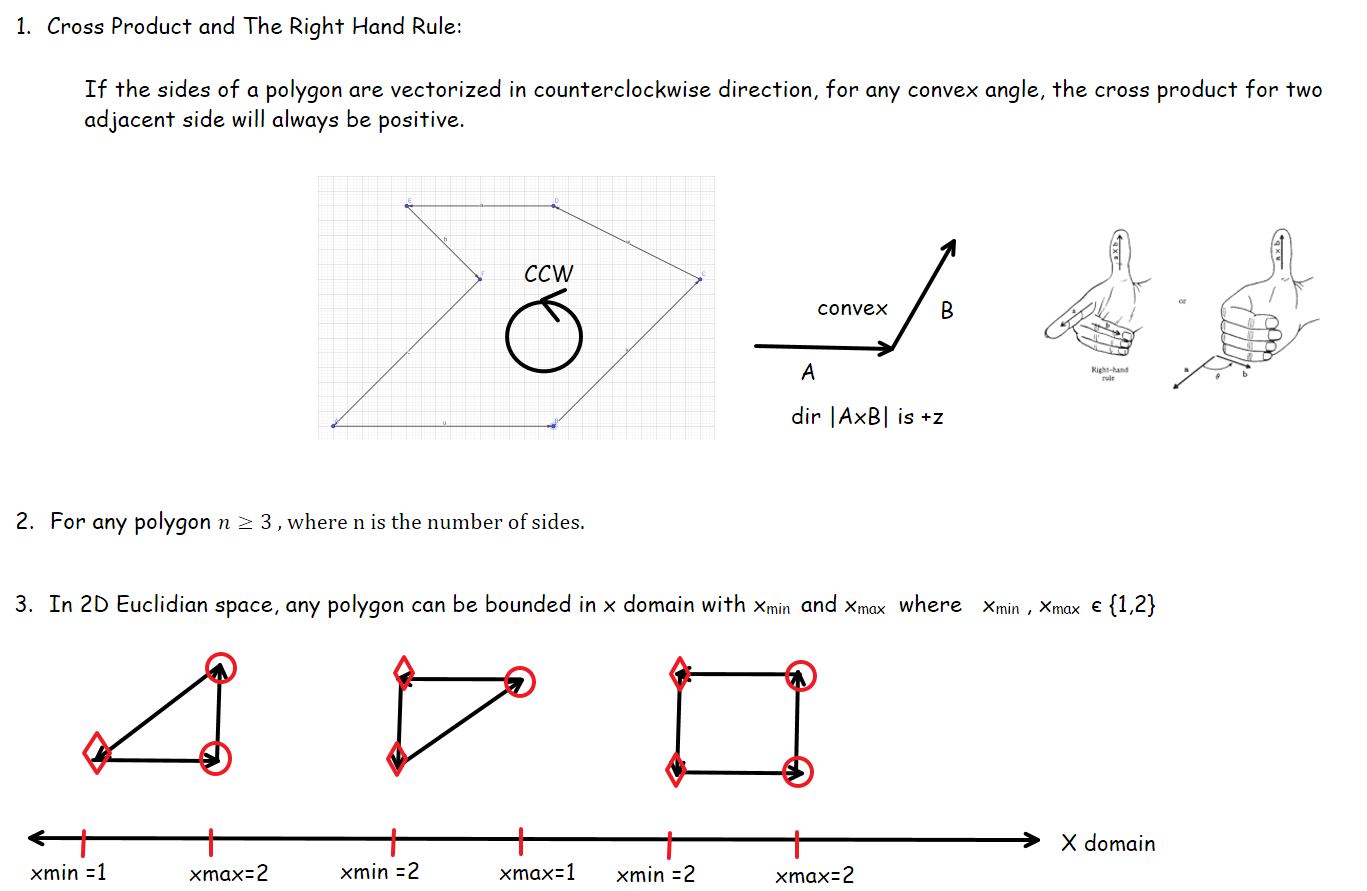

In [11]:
display.Image("./Foundamental_Principle.png")

### Strategy for Crafting Algorithm

#### Analyze the Polygon
1. How many Convex points? Apply cross product rule.
2. Bound x domain to find extreme left/right points.
3. Non-convex angle points = (number of sides) - (convex points). *** convex points already includes two extream points
4. Convex points located between two extream points(middle convex) = num convex- num extream points

After these steps there should be three sets:


$$ \Rightarrow Set \ 1 = \{Convex \ points \ located \ between \ two \ extream \ points\} $$
$$ \Rightarrow Set \ 2 = \{Extream \ verticies\} $$
$$ \Rightarrow Set \ 3 = \{Concave \  points\} $$



### Trapizoidation of Workplane

1. Segment parallel to y axis through extream vertices/points. These two segments will bound the polygon within X domain.
2. *Shortest Segments parallel to y axis from CONVEX points to the X axis of the workplane.
3. Segment between two adjacent CONVEX verticies of a NON-CONVEX vertex.

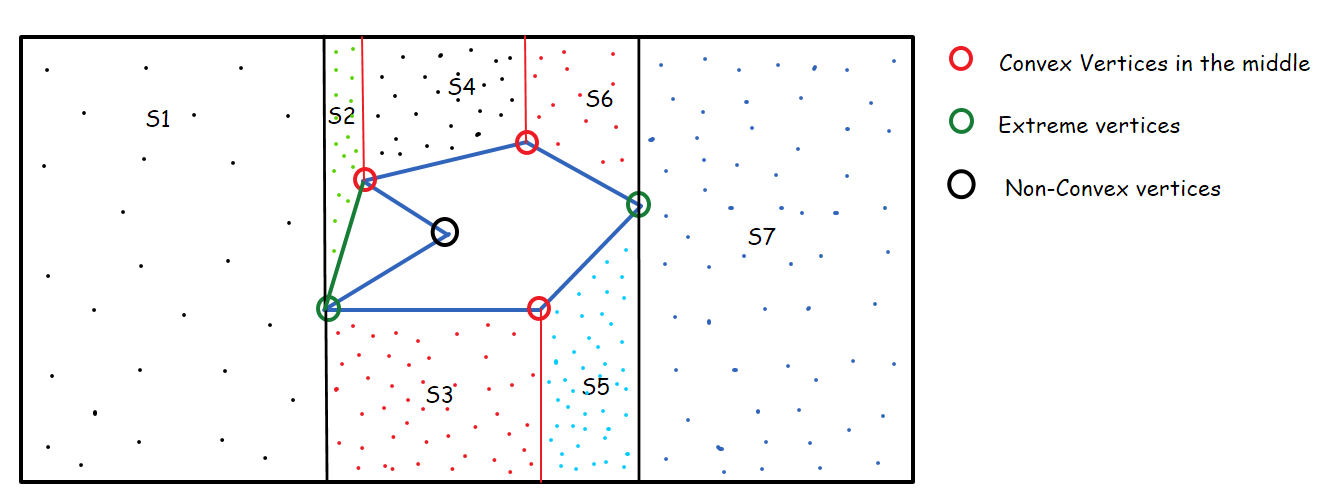

In [12]:
display.Image("./Trap.png")

## Part $\mathrm{(ii)}$

Define cross product rule to find if the polygon is convex or non-convex

In [2]:
def PolyConvex(arg):  # returns coordinate of vertecies which have inside angles./ Non-convex vertices
    
    # returns a ( 2 x  number of vertices  array). ex: 2x6
    
    
    #---------------Process input data---------------
    x,y = zip(*arg)  # store x and y coordinate values of vertices in a separate list 
       
    
    # convert into numpy array
    xcoor = np.array(x)
    ycoor = np.array(y)
    A     = np.zeros((2,len(x)-2))  # a 2(row) x len(x)-2 array to store the xcoor index values for inner angle vertices
    
   
    
    # -----------------------------------------------find the cross product of vector in counter-clockwise manner
    
    # initialize index var for iteration
    indx = 1  
    indA = 0
    
    while(indx<len(x)-1):  # loop through x and y coordinate array 
        
        vec1 = [xcoor[indx]-xcoor[indx-1],ycoor[indx]-ycoor[indx-1]]   # 1st vector (vertex i -> vertex j  )     j is the vertex with targeted angle
        vec2 = [xcoor[indx+1]-xcoor[indx],ycoor[indx+1]-ycoor[indx]]   # 2nd vector (vertex j -> vertex k)
        
        crossprod = np.cross(vec1,vec2)  # calculate cross product in counter clockwise manner
        if(crossprod<0): # if cross product is negative that means the angle is an insider
            A[0][indA] = xcoor[indx]  # store the x-coordinate of vertex with inside angle
            A[1][indA] = ycoor[indx]  # store the y-coordinate of vertex with inside angle
            indA=indA+1      # increase the A array index
        else:
            A[0][indA] = 131.25  # just a random number to keep track of empty space
            A[1][indA] = 131.25  # jsut a random number to keep track of empty array space
            indA=indA+1      # increase the A array index
                
        indx =indx+1 # increas while loop index
        
   # lets find out the number of non-convex vertices 
    count = 0 # initialize counter variable 
    i = 0     # initialize iterator variable
     
    while(i<len(A[0][:])):    # counts number of inside vertices 
        if(A[0][i]!=131.25):  # if theres no match with pre defined integer taht the non-convex vertex coordinate
            count=count+1;    # count 
        i=i+1                 # next iteration
    
     
    # now we will construct our final result array which will include non-convex vertices coordinates   
    NonConvex = np.zeros((2,count)) # initizalize the array
    
    k=0            # loop iterator
    indx = 0       # index variable
    while(k<len(A[0][:])):    # loop until you cover length of array A
        if(A[0][k]!=131.25):  # we dont want this boring number but the actual coordinate 
            NonConvex[0][indx]=A[0][k] # store x location
            NonConvex[1][indx]=A[1][k] # store y lcoation
            k=k+1        # next iteration
            indx=indx+1  # increase index value
        else: # is we dont find actual coordinate
            k=k+1 # go to next iteration
        
    
    
    return NonConvex, count

In [8]:
d,c=PolyConvex(mypoly2)
print(d)

[[6. 3.]
 [6. 4.]]


In [5]:
def PolyPlot(arg):
    # input: arg1: polygon vertices (include 1st point one more time after last point)
    
    
    # returns plot of vectorized polygon
    
    
    import matplotlib.pyplot as plt  # import matplotlib library
    x2,y2 = zip(*arg)               # x and y coordinate for polygon
    
    plt.figure(dpi=100)              # graph window size
    
    
    # vectorize the polygan in counter clockwise manner
    
    ax=plt.axes()
    
    # convert into numpy array
    xcoor = np.array(x2)
    ycoor = np.array(y2)
    
    
    indx=0 # index for arrays
    
    while(indx<len(x2)-1):
        
        ax.arrow(xcoor[indx], ycoor[indx], xcoor[indx+1]-xcoor[indx], ycoor[indx+1]-ycoor[indx], head_width=.5, head_length=1,  fc='lightblue', ec='black')
        
        indx+=1
    
    
    plt.title("Vectorized Polygon")
    
    
    
    return 

In [6]:
def WrkSpcPlot(arg1,arg2):
    # arg 1: workspace points (include 1st point twice. append to the end of the array)
    # arg 2: polygon vertices (include 1st point twice. append at the end of the array)
    
    import matplotlib.pyplot as plt  # import matplotlib library
    x1,y1 = zip(*arg1)               # x coordinate and y coordinate for worksapce
    x2,y2 = zip(*arg2)               # x and y coordinate for polygon
    
    plt.figure(dpi=100)              # graph window size
    plt.title("Workspace plot")
    return plt.plot(x1,y1,'-o'), plt.plot(x2,y2,'-o')
    

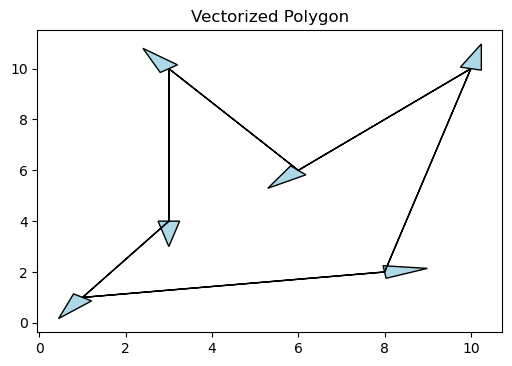

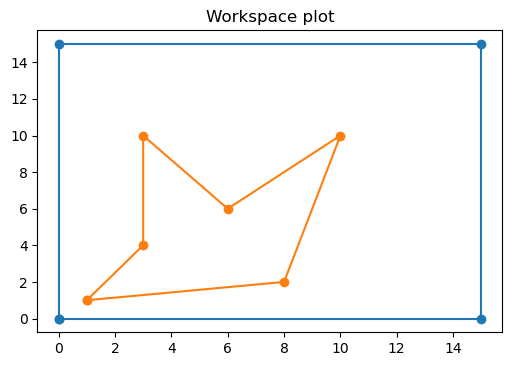

In [7]:
mypoly2=[[1,1],[8,2],[10,10],[6,6],[3,10],[3,4],[1,1]] # A test polygon. define the vertices in counter-clockwise manner
workspc =[[0,0],[15,0],[15,15],[0,15],[0,0]]           # A test workspace
 
PolyPlot(mypoly2)             # plots vectorized polygon

WrkSpcPlot(workspc,mypoly2)   # plots total workspace

A,count =PolyConvex(mypoly2)         # finds polygon vertices with inner angle

In [9]:
print(len(A[1][:]))

2


In [10]:
def PolyXMinMax(arg): # find vertices with min and max x coordinate
    
    # returns  [ [xmax , xmin ] , [xmaxy, xaminy] ]
            
    #---------------Process input data---------------
    x,y = zip(*arg)  # store x and y coordinate values of vertices in a separate list 
     
    # convert into numpy array
    xcoor = np.array(x)
    ycoor = np.array(y)
    
    xmin = np.amin(xcoor) # find min x
    
    xmax = np.amax(xcoor) # max x
    
    # array indeces
    i = 0
    k = 0
    while(i<len(x)):    # find y coordinate for vertex with min x coordinate
        if(xmin==xcoor[i]):
            xminy = ycoor[i]
            break
        else:
            i=i+1
        
    while(k<len(x)):  # find y coordinate for vertex with max x coordinate
        if(xmax==xcoor[k]):
            xmaxy = ycoor[k]
            break
        else:
            k=k+1
            
    B = np.zeros((2,2)) # initialize the array for max min x coordinate.
    
    # store the extream left and right vertex values
    B[0][0]= xmin
    B[0][1]= xminy
    B[1][0]= xmax
    B[1][1]= xmaxy
    
    return B

In [11]:
maxmin=PolyXMinMax(mypoly2)

print(len(maxmin))

2


In [44]:
def SwepTrap(arg1,arg2):
    
    #---------------Process input data---------------
    x,y = zip(*arg2)  # store x and y coordinate values of vertices in a separate list 
       
    
    # convert into numpy array
    xcoor = np.array(x)
    ycoor = np.array(y)
    
    NumTotalVertex = len(x)-1 # this is the numebr of total vertex as vertex 1 appears twice for graphing purpose
    
    # check for vertices with inside angle/ non-convex vertices
    
    NonConvexVert,count = PolyConvex(arg2) 
    
    # find vertices with min and max x bound. Extream left and right vertices 
    
    LeftRightVert = PolyXMinMax(arg2)
    
    # middle region is defined by, region betwwen extream left and right vertices
    # lets find the total number of convex vertices located in middle region. 
    
    NumMidConvexVert = NumTotalVertex-(2)-count # extream left and right vertices = 2
                                                # count is the numebr of non-convex vertices
    
    

    
    # construct an array of coordinates for middle vertices with convex angle
    # we know that we have <NumMidConvexVert> many convex vertices located in middle region
        
    # lets define an array for convex vertices in middle
    
    #Outside_Vert = np.zeros((2,NumMidConvexVert)) 
    MidConvexVert = np.zeros((2,100)) 

    # we want to shift all elements from [xcoor,ycoor] excluding non-convex vertex points, extream left vertex points and extream right vertex point
    
    i = 0;                                              # outer loop iterator
    j = 0                                               # inside loop iterator
    k = 0                                               # array index
    c = 0                                               # counts inner iteration
                               
    while(i<NumTotalVertex):
        j=0
        while(j<len(NonConvexVert[0][:])):
            if(xcoor[i]!=NonConvexVert[0][J]): # NO MATCH FOUND. get inside and move array elements
                j=j+1
            else:
                c=c+1
                j=j+1 
        i=i+1
                
                
                
        
     
        
        
        
                     
                        
                        
                        
                      
                        
                    
                        
                        
                        
        
      
                
    
    
    
    
    # find y distance between inner vertices and workspace boundary
    
        # while() ???
        
            # if abs((y_up - yi)) < abs((y_down -yi)) 
            
                    # Eqline(xi,yi,xi,y_up)  for ith vertex
    
    return MidConvexVert, NonConvexVert , LeftRightVert, xcoor , NumMidConvexVert

In [42]:
MidConvexVert, NonConvexVert , LeftRightVert, xcoor , NumMidConvexVert=SwepTrap(workspc,mypoly2)


In [124]:
print(MidConvexVert)


[[ 1.  8. 10.  6.  3.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2. 10.  6. 10.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [43]:
print(MidConvexVert)

[[ 1.  1.  8.  8. 10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  2.  2. 10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [28]:
Inside_Vert,count = PolyConvex(mypoly2) 

In [47]:
print(Out)

[[ 1.  8. 10.  0.  0.  0.]
 [ 1.  2. 10.  0.  0.  0.]]


In [308]:
Inside_Vert[0][0]

131.25

In [100]:
print(len(NonConvexVert[0][:]))

2
